In [19]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [20]:
df = pd.read_csv('../data/training.csv') 

In [37]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623


In [36]:
duplicated = df.duplicated(subset=["RefId"], keep='first')
df[duplicated == True]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost


In [59]:
df[df['IsBadBuy']== 1][['IsBadBuy','VehBCost','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',   
'MMRAcquisitonRetailCleanPrice',      
'MMRCurrentAuctionAveragePrice',      
'MMRCurrentAuctionCleanPrice',        
'MMRCurrentRetailAveragePrice',       
'MMRCurrentRetailCleanPrice']].head()

,IsBadBuy,VehBCost,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
0,1,6100.0,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0
35,1,4450.0,3371.0,4135.0,6627.0,7269.0,2829.0,3942.0,5810.0,6860.0
38,1,5455.0,4811.0,5910.0,8379.0,9705.0,5019.0,6013.0,8218.0,9647.0
49,1,7915.0,6730.0,7467.0,9948.0,11038.0,7010.0,7961.0,10640.0,11779.0
50,1,6585.0,5711.0,6551.0,8397.0,9353.0,3764.0,4570.0,7056.0,7992.0


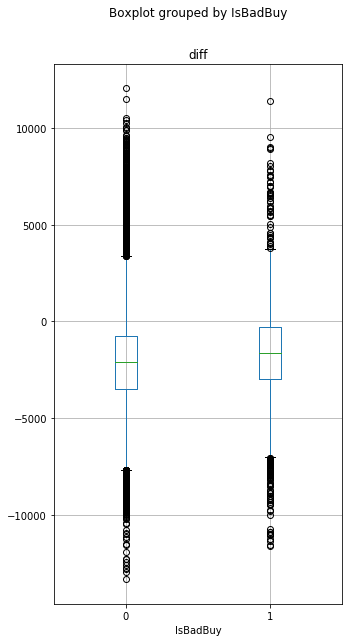

In [104]:
df['diff'] = df['VehBCost'] - df['MMRCurrentRetailAveragePrice']
boxplot = df.boxplot(column = ['diff'], figsize = (5,10), by = 'IsBadBuy')

In [110]:
isBadBuy_temp = df['VehBCost'] - df['MMRCurrentRetailAveragePrice']
isBadBuy = isBadBuy_temp > 0
print(isBadBuy.value_counts())

False    49644
True      8742
dtype: int64


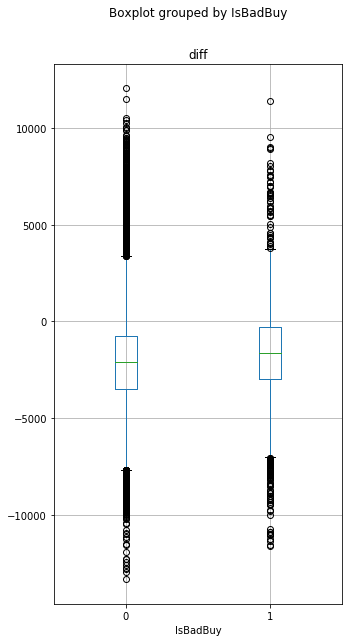

In [92]:
frame = { 'IsBadBuy': df['IsBadBuy'], 'diff': isBadBuy_temp } 
result = pd.DataFrame(frame) 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null object
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Model                                58386 non-null object
Trim                                 56475 non-null object
SubModel                             58379 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nationalit

In [49]:


isBadBuy = df['MMRAcquisitonRetailCleanPrice'] - df['VehBCost']
isBadBuy.head()

0    4705.0
1    3478.0
2    4152.0
3    2966.0
4    1994.0
dtype: float64

In [73]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,58386.000000,58386.000000,58386.000000,58386.000000,55813.000000,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58141.000000,58141.000000,58141.000000,58141.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,36567.888449,0.123454,2005.344637,4.174956,1.495566,71478.090518,6128.127953,7372.912699,8497.288558,9851.768061,6131.666655,7389.958652,8776.065118,10145.227034,26359.191519,58125.258195,6730.008335,0.025674,1276.105042
std,21092.254801,0.328961,1.733307,1.713833,0.520802,14591.224550,2456.632611,2715.506462,3151.106237,3378.839613,2432.171539,2682.310828,3086.373733,3304.637060,25804.795573,26146.806098,1762.075265,0.158162,598.885423
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18270.250000,0.000000,2004.000000,3.000000,1.000000,61785.000000,4273.000000,5409.000000,6279.000000,7501.000000,4275.000000,5415.000000,6538.000000,7788.000000,17212.000000,32124.000000,5430.000000,0.000000,837.000000
50%,36608.500000,0.000000,2005.000000,4.000000,1.000000,73359.000000,6097.000000,7308.000000,8448.000000,9798.000000,6063.000000,7311.000000,8733.000000,10103.000000,19662.000000,74135.000000,6700.000000,0.000000,1155.000000
75%,54811.500000,0.000000,2007.000000,5.000000,2.000000,82427.000000,7765.000000,9017.000000,10652.000000,12084.000000,7737.000000,9014.000000,10910.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,36485.000000,1.000000,7498.000000


In [71]:
#df.isnull().sum()
df.isnull().sum()[df.isnull().sum() > 0] #solo con missing values

Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentAuctionCleanPrice            245
MMRCurrentRetailAveragePrice           245
MMRCurrentRetailCleanPrice             245
PRIMEUNIT                            55703
AUCGUART                             55703
dtype: int64

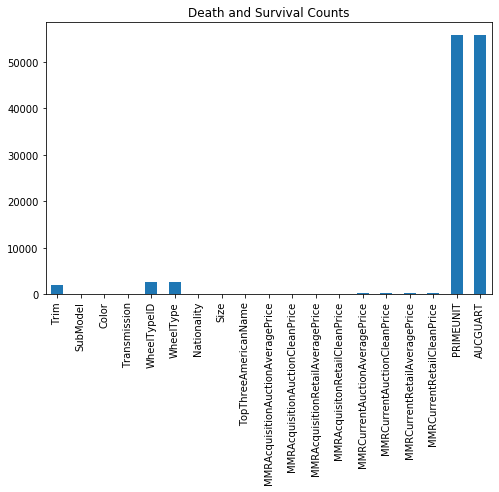

In [231]:
df.isnull().sum()[df.isnull().sum() > 0].plot(kind='bar', 
                                   title='Death and Survival Counts', figsize=(8,5))
plt.show() #absolute counts (you can normalized)

In [11]:
df['Size'].value_counts() 

MEDIUM         24644
LARGE           7120
MEDIUM SUV      6398
COMPACT         5764
VAN             4677
LARGE TRUCK     2554
SMALL SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE SUV       1157
SMALL TRUCK      696
SPORTS           621
Name: Size, dtype: int64

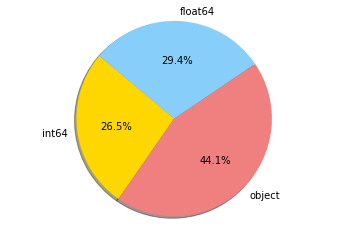

In [21]:
#Pie chart of data types
# Data to plot
labels = 'int64', 'object', 'float64'
sizes = [9, 15, 10]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

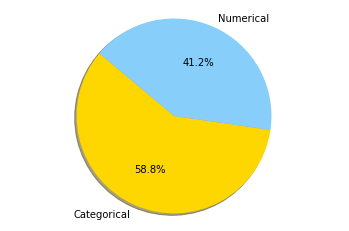

In [250]:
#Pie chart of data types
# Data to plot
labels = 'Categorical', 'Numerical'
sizes = [20, 14]
colors = ['gold', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<h1> Distribution </h1>

### - RefId
This feature represents a unique (sequential) number assigned to vehicles, so there is no sense to plot its distribution.

Categorical-Nominal type attribute (discrete numerical value)

### - IsBadBuy
This feature identifies if the kicked vehicle was an avoidable purchase.

Categorical-Nominal type attribute (discrete numerical value)

0 -> good

1 -> bad

Highly imbalanced

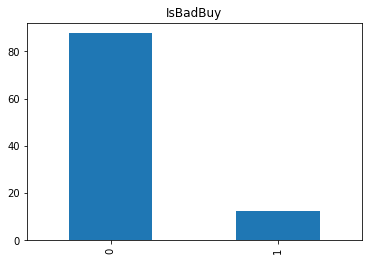

In [101]:
(df['IsBadBuy'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='IsBadBuy')
plt.show() 

### - PurchDate
This feature represents the date the vehicle was purchased at Auction

Numerical-Interval type attribute (discrete numerical value)

### - Auction
This feature represents the auction provider at which the vehicle was purchased.

Categorical-Nominal type attribute

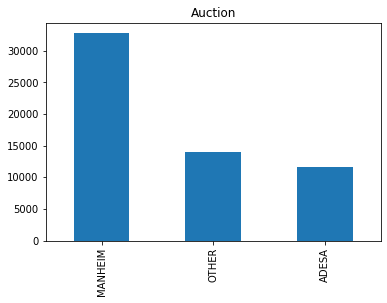

In [75]:
df['Auction'].value_counts().plot(kind='bar', 
                                   title='Auction')
plt.show() 

### - VehYear
This feature represents the manufacturer’s year of the vehicle.

Numerical-Interval type attribute (discrete numerical value)

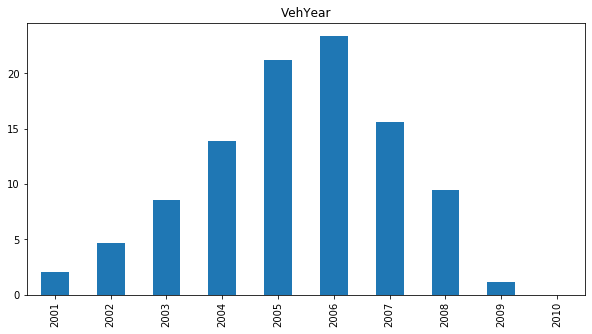

In [119]:
veh_years_count_ned = df['VehYear'].value_counts(normalize=True)*100

veh_years_count_ned.sort_index().plot(kind='bar', 
                                   title='VehYear', figsize = (10,5))
plt.show() 

### - VehicleAge
This feature represents the years elapsed since the manufacturer’s year (PurchDate -VehYear)

Numerical-Ratio type attribute (discrete numerical value)

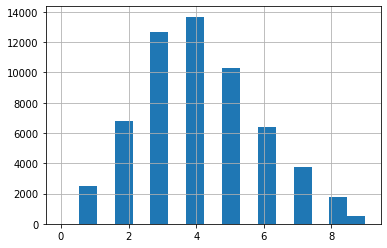

In [240]:
df['VehicleAge'].hist(bins=17)

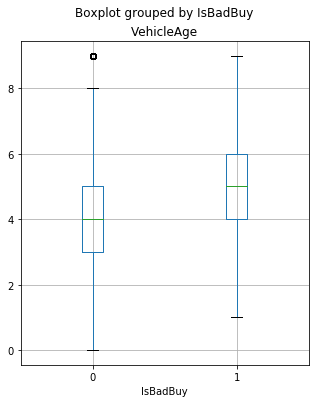

In [221]:
boxplot = df.boxplot(column=['VehicleAge'], figsize=(5,6), by='IsBadBuy')

### - Make

This feature represents the Vehicle Manufacturer.

Categorical-Nominal type attribute

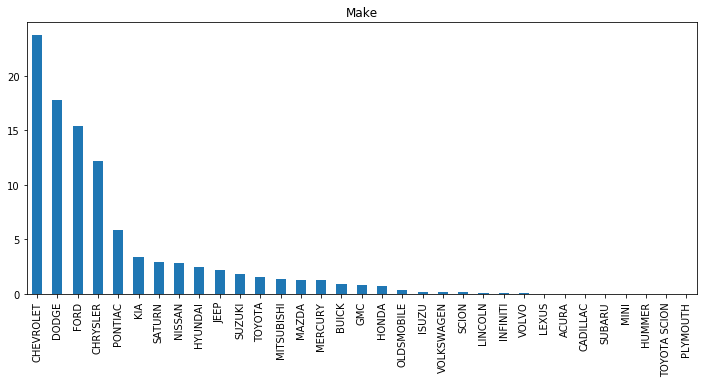

In [121]:
(df['Make'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Make', figsize=(12,5))
plt.show() 

### - Model
This feature represents the vehicle Model

Categorical-Nominal type attribute

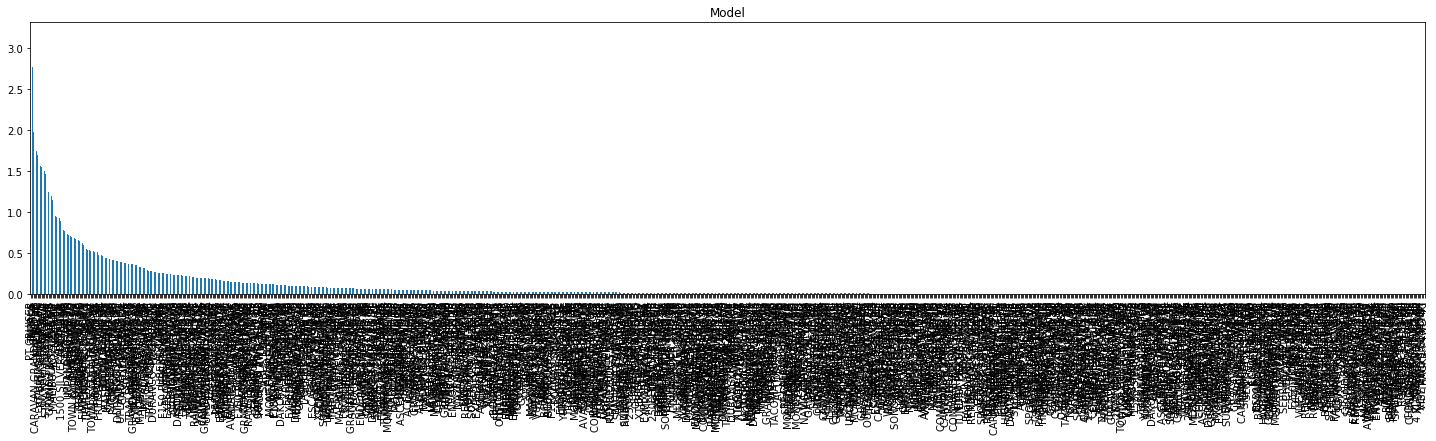

In [123]:
(df['Model'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Model', figsize=(25,5))
plt.show() 

### - Trim
This feature represents the vehicle Trim Level.
For a given car model, the trim level denotes which equipment and features are included as standard. A car buyer may add to this standard equipment with trim packages or individual options. The trim level with the least equipment/features is referred to as the "base model",[2] and the trim level with the most equipment/features is referred to as "highest specification" or colloquially as "fully loaded".
Trim levels are often designated by a pair of letters, for example DX, LX, LS, EX, GL, SE or GT.[1] They can also be designated an alphanumeric code (eg Z28, XR5, GT3), or using a word (eg Executive, Ambition or Deluxe).

Categorical-Nominal type attribute

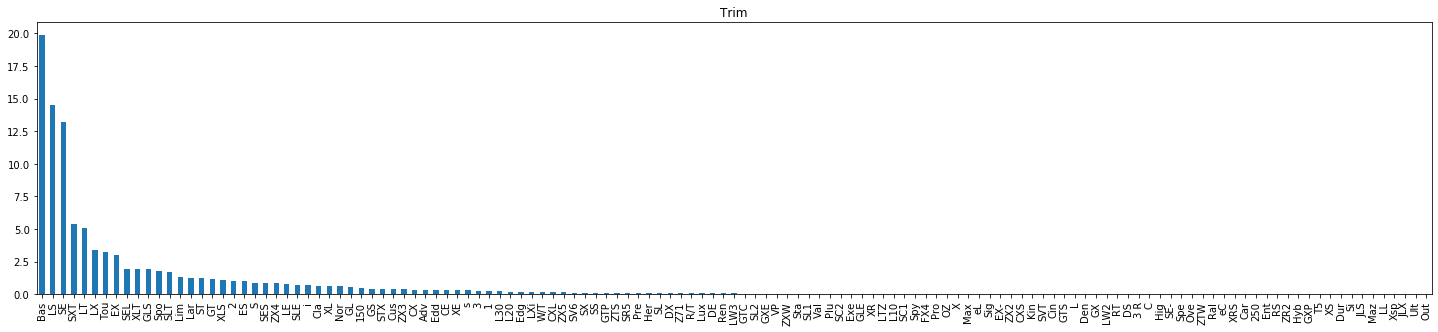

In [124]:
(df['Trim'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Trim', figsize=(25,5))
plt.show() 

### - SubModel
This feature represents the vehicle submodel. It can't be plotted as barchart.

Categorical-Nominal type attribute

### - Color
This feature represents the vehicle color

Categorical-Nominal type attribute

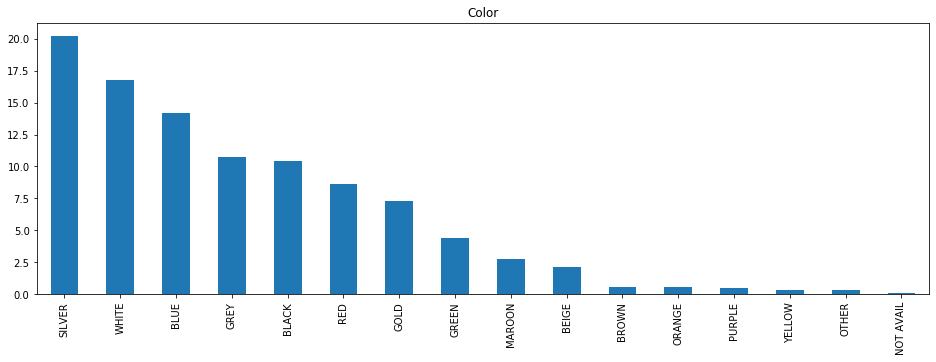

In [127]:
(df['Color'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Color', figsize=(16,5))
plt.show() 

### - Transmission
This feature represents the Vehicles transmission type.

Categorical-nominal type attribute

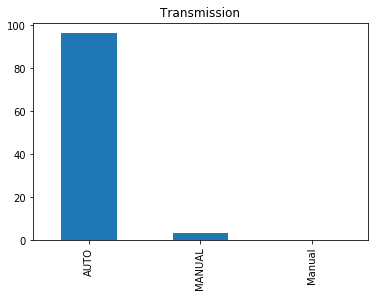

In [141]:
(df['Transmission'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Transmission')
plt.show() 

### - WheelTypeID
This feature represents the type id of the vehicle wheel.

Categorical-Nominal type attribute (discrete numerical value)

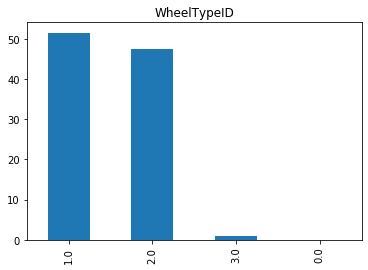

In [132]:
(df['WheelTypeID'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='WheelTypeID')
plt.show() 

### - WheelType
This feature represents the vehicle wheel type description.

Categorical-Nominal type attribute

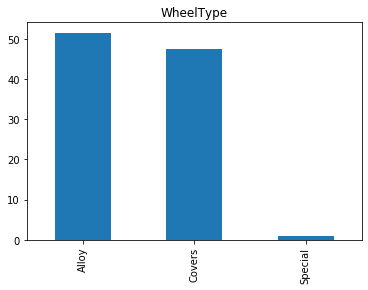

In [139]:
(df['WheelType'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='WheelType')
plt.show() 

### - VehOdo
This feature represents vehicles odometer reading.

Numerical-Ratio type attribute

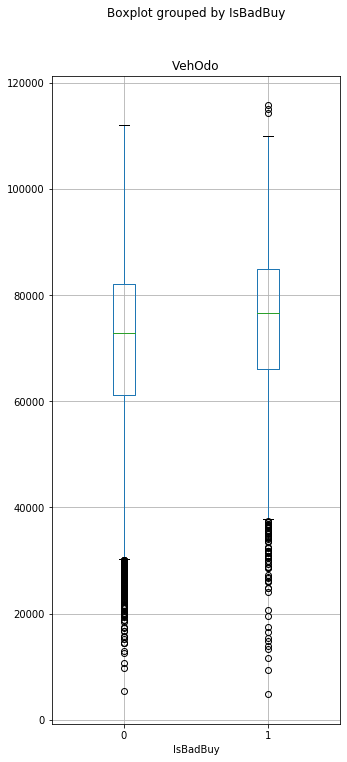

In [215]:
boxplot = df.boxplot(column=['VehOdo'], figsize=(5,12), by='IsBadBuy')

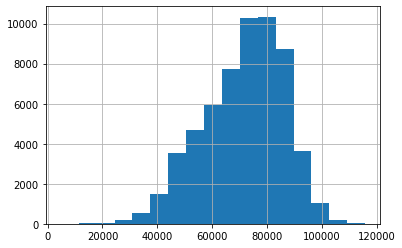

In [239]:
df['VehOdo'].hist(bins=17)

### - Nationality
This feature represents the Manufacturer’s country.

Categorical-Nominal type attribute

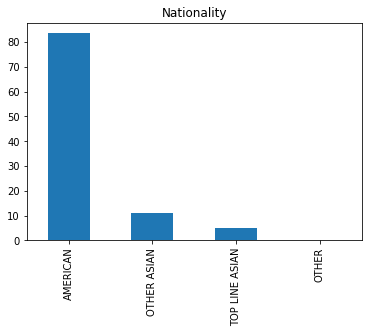

In [140]:
(df['Nationality'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Nationality')
plt.show() 

### - Size
This feature represents the size category of the vehicle.

Categorical-Nominal type attribute

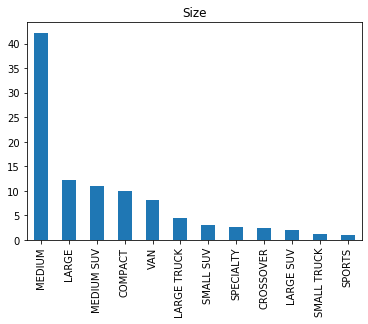

In [153]:
(df['Size'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Size')
plt.show() 

### - TopThreeAmericanName
This feature identifies if the manufacturer is one of the topthree American manufacturers.

Categorical-Nominal type attribute

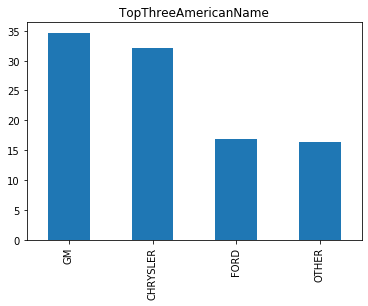

In [154]:
(df['TopThreeAmericanName'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='TopThreeAmericanName')
plt.show() 

### - MMRAcquisitionAuctionAveragePrice
This feature represents the acquisition price for this vehi-cle in average condition at time of purchase.
The vehicle may have a few mechanical and/or cosmetic problems and itmay require a considerable amount of reconditioning.

Numerical-Ratio type attribute

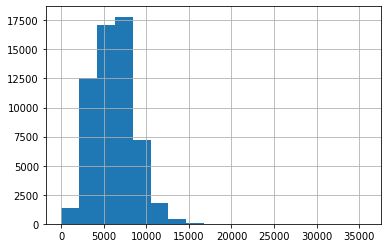

In [238]:
df['MMRAcquisitionAuctionAveragePrice'].hist(bins=17)

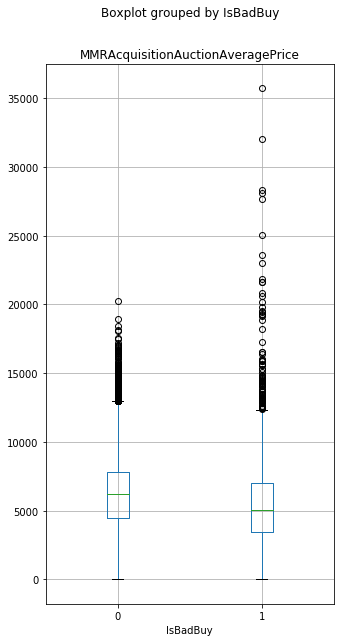

In [213]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'], figsize=(5,10), by='IsBadBuy')

### - MMRAcquisitionAuctionCleanPrice
This feature represents the acquisition price for this vehicle in the above Average condition at time of purchase.
The vehicle has some normal wear but no major mechanical or cosmeticproblems and it may require limited reconditioning.

Numerical-Ratio type attribute

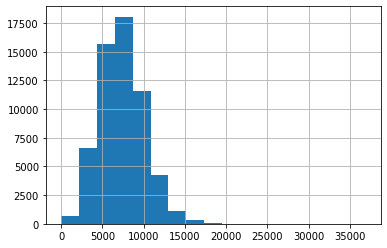

In [241]:
df['MMRAcquisitionAuctionCleanPrice'].hist(bins=17)

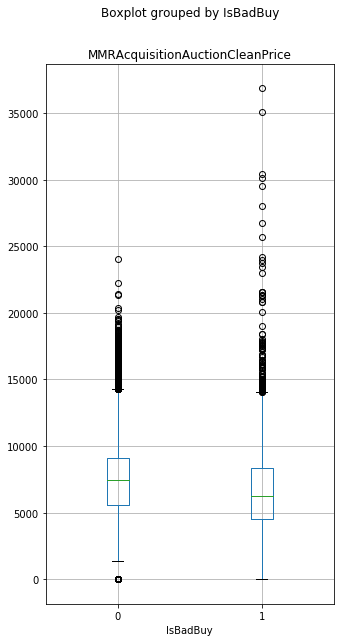

In [212]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionCleanPrice'], figsize=(5,10), by='IsBadBuy')

### - MMRAcquisitionRetailAveragePrice
This feature represents the acquisition price for this vehiclein the retail market in average condition at time of purchase.
The vehicle may have a few mechanical and/or cosmetic problemsand it may require a considerable amount of reconditioning.

Numerical-Ratio type attribute

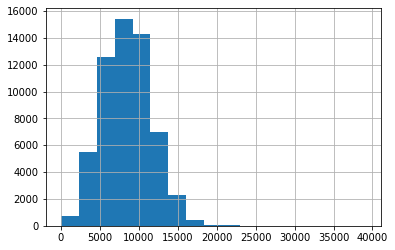

In [242]:
df['MMRAcquisitionRetailAveragePrice'].hist(bins=17)

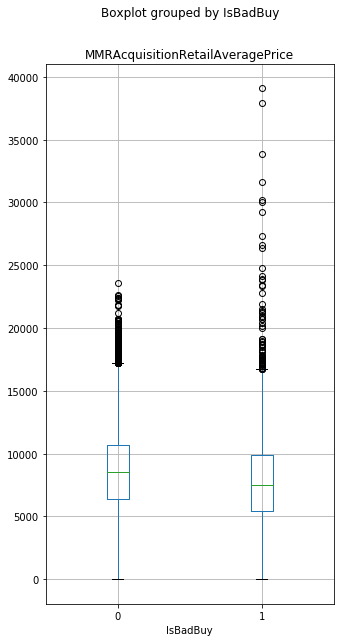

In [211]:
boxplot = df.boxplot(column=['MMRAcquisitionRetailAveragePrice'], figsize=(5,10), by='IsBadBuy')

### - MMRAcquisitonRetailCleanPrice
This feature represents the acquisition price for this vehicle inthe retail market in above average condition at time of purchase.
The vehicle has some normal wear but no major mechanical or cos-metic problems and it may require limited reconditioning.

Numerical-Ratio type attribute

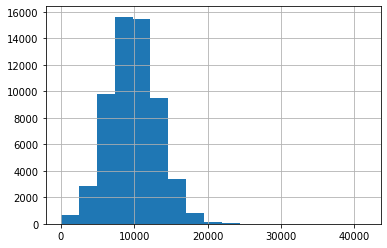

In [243]:
df['MMRAcquisitonRetailCleanPrice'].hist(bins=17)

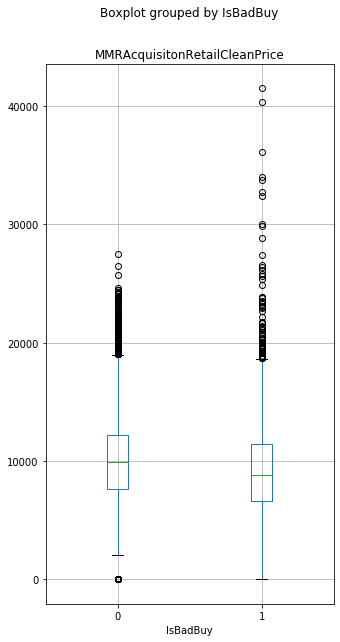

In [210]:
boxplot = df.boxplot(column=['MMRAcquisitonRetailCleanPrice'], figsize=(5,10), by='IsBadBuy')

### - MMRCurrentAuctionAveragePrice
This feature represents the acquisition price for this vehiclein average condition as of current day (2010).
The vehicle may have a few mechanical and/or cosmeticproblems and it may require a considerable amount of reconditioning.

Numerical-Ratio type attribute

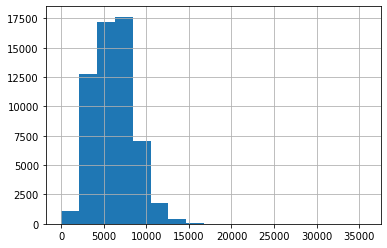

In [244]:
df['MMRCurrentAuctionAveragePrice'].hist(bins=17)

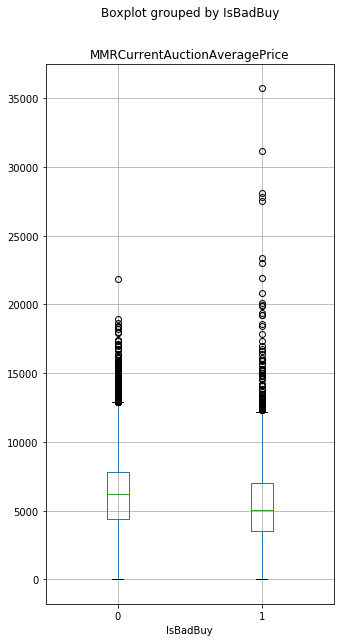

In [209]:
boxplot = df.boxplot(column=['MMRCurrentAuctionAveragePrice'], figsize=(5,10), by='IsBadBuy')

### - MMRCurrentAuctionCleanPrice
This feature represents the acquisition price for this vehicle inthe above condition as of current day (2010).
The vehicle has some normal wear but no major mechan-ical or cosmetic problems and it may require limited reconditioning.

Numerical-Ratio type attribute

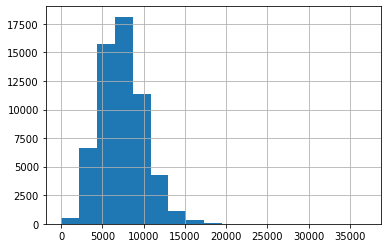

In [245]:
df['MMRCurrentAuctionCleanPrice'].hist(bins=17)

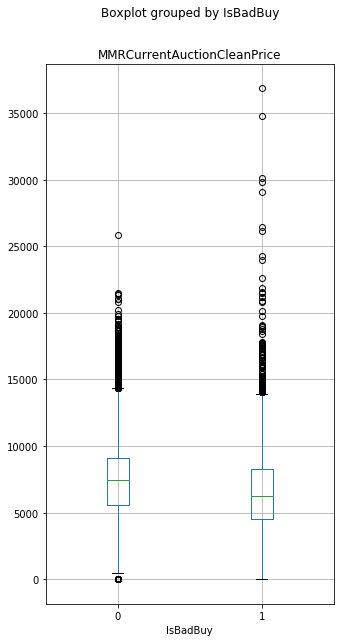

In [208]:
boxplot = df.boxplot(column=['MMRCurrentAuctionCleanPrice'], figsize=(5,10), by='IsBadBuy')

### - MMRCurrentRetailAveragePrice
This feature represents the acquisition price for this vehicle inthe retail market in average condition as of current day (2010).
The vehicle may have a few mechanical and/or cosmeticproblems and it may require a considerable amount of reconditioning.

Numerical-Ratio type attribute

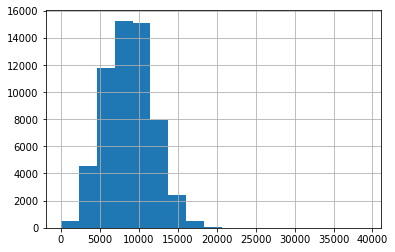

In [246]:
df['MMRCurrentRetailAveragePrice'].hist(bins=17)

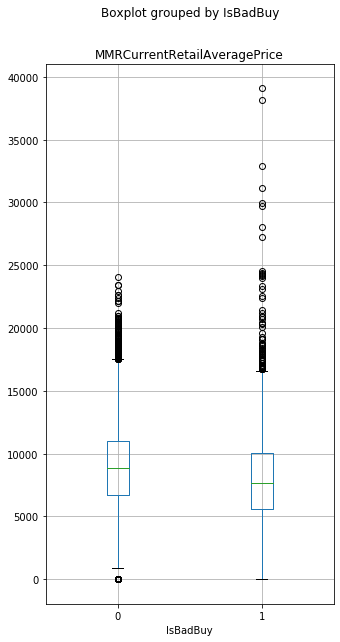

In [207]:
boxplot = df.boxplot(column=['MMRCurrentRetailAveragePrice'], figsize=(5,10), by='IsBadBuy')

### - MMRCurrentRetailCleanPrice
This feature represents the acquisition price for this vehicle in theretail market in above average condition as of current day (2010).
The vehicle has some normal wear but no major mechan-ical or cosmetic problems and it may require limited reconditioning.

Numerical-Ratio type attribute

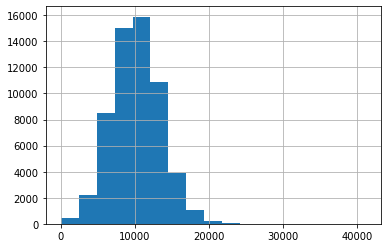

In [247]:
df['MMRCurrentRetailCleanPrice'].hist(bins=17)

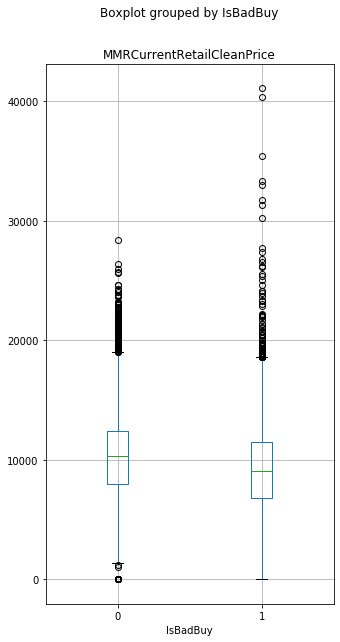

In [206]:
boxplot = df.boxplot(column=['MMRCurrentRetailCleanPrice'], figsize=(5,10), by='IsBadBuy')

### - PRIMEUNIT
This feature identifies if the vehicle would have a higher demand than a standard purchase.

Categorical-Nominal type attribute (discrete numerical value)

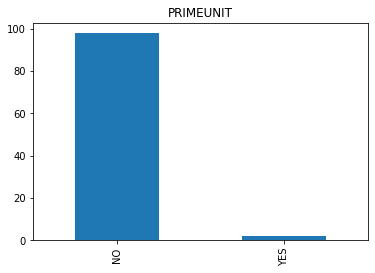

In [168]:
(df['PRIMEUNIT'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='PRIMEUNIT')
plt.show()

### - AUCGUART
This feature represents the level guarntee provided by auction for the vehicle:

Greenlight - Guaranteed/arbitratable, 
Yellow Light - caution/issue, 
Red light - sold as is

Categorical-Ordinal type attribute (discrete numerical value)

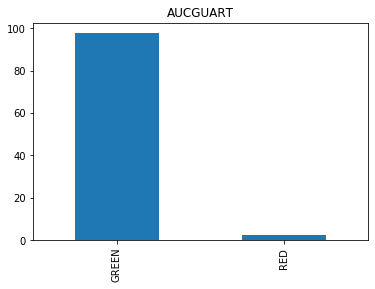

In [169]:
(df['AUCGUART'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='AUCGUART')
plt.show()

### - BYRNO
This feature represents the unique number assigned to the buyer that purchased the vehicle, so there is no sense to plot its distribution.

Categorical-Nominal type attribute (discrete numerical value)

### - VNZIP1
This feature represents the zipcode where the car was purchased. 

Categorical-Nominal type attribute (discrete numerical value)

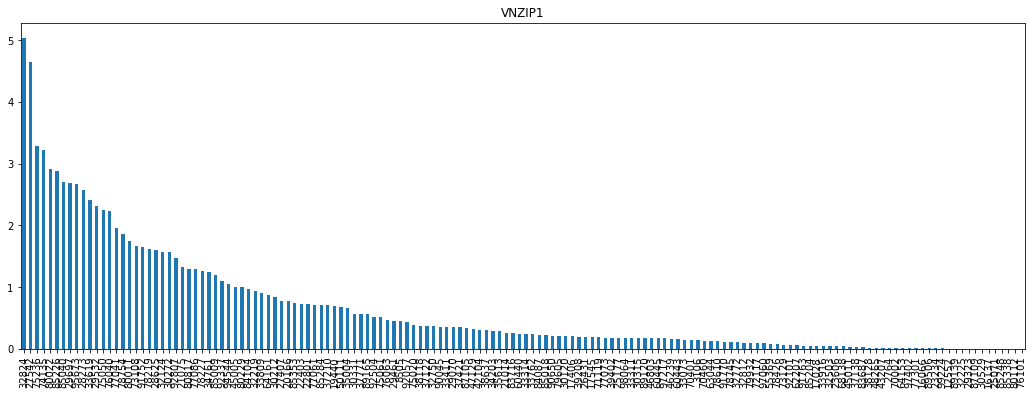

In [171]:
(df['VNZIP1'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='VNZIP1', figsize=(18,6))
plt.show()

### - VNST
This feature represents the State where the the car was purchased.

Categorical-Nominal type attribute

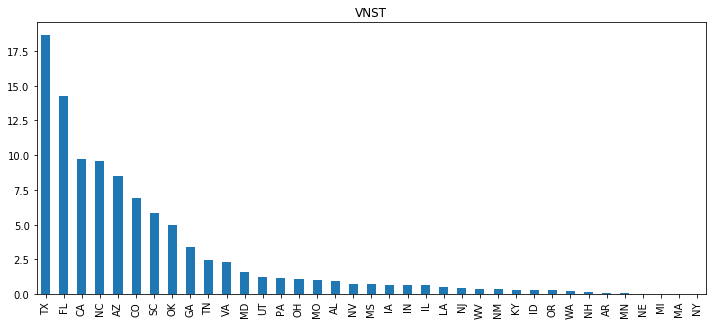

In [173]:
(df['VNST'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='VNST', figsize=(12,5))
plt.show()

### - VehBCost
This feature represents the acquisition cost paid for the vehicle at time of purchase.

Numeric-Ratio type attribute

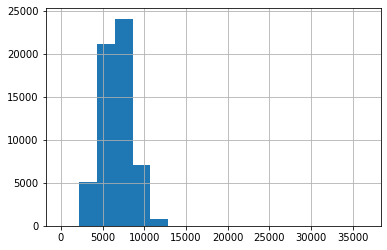

In [248]:
df['VehBCost'].hist(bins=17)

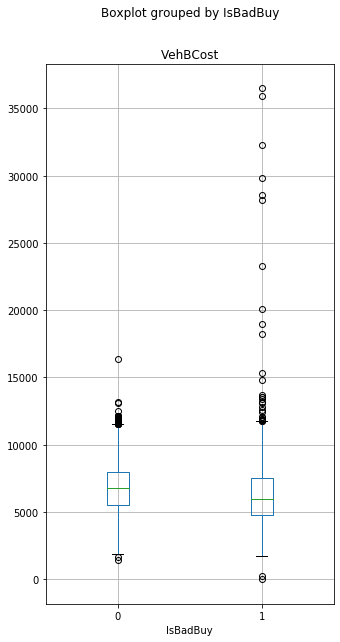

In [205]:
boxplot = df.boxplot(column=['VehBCost'], figsize=(5,10), by='IsBadBuy')

### - IsOnlineSale
This feature identifies if the vehicle was originally purchased online.

Categorical-Nominal type attribute (discrete numerical value)

0 -> Yes (?)

1 -> No (?)

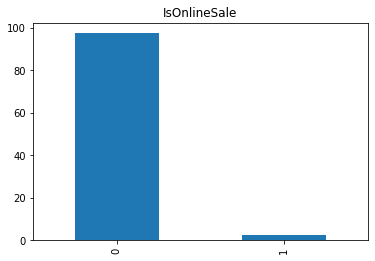

In [178]:
(df['IsOnlineSale'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='IsOnlineSale')
plt.show()

### - WarrantyCost
This feature represents the warranty price (term=36month and millage=36K) 

Numeric-Ratio type attribute

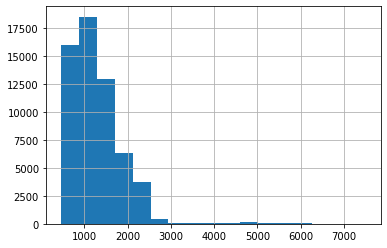

In [249]:
df['WarrantyCost'].hist(bins=17)

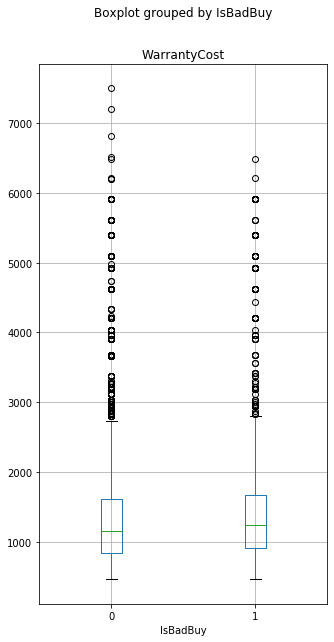

In [204]:
boxplot = df.boxplot(column=['WarrantyCost'], figsize=(5,10), by='IsBadBuy')